<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Vaccine_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/En_vaccine_tweets.csv")
df

,file_name,tweet_id,text,author_id,conversation_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,public_metrics
0,search_recent_tweets_Pediatric Vaccines Popula...,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,NaN,2024-01-30T09:15:16+00:00,en,retweeted,1752250678733681060,"{'retweet_count': 3, 'reply_count': 0, 'like_c..."
1,search_recent_tweets_Pediatric Vaccines Popula...,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,NaN,2024-01-30T09:15:10+00:00,en,retweeted,1752193108455108797,"{'retweet_count': 1528, 'reply_count': 0, 'lik..."
2,search_recent_tweets_Pediatric Vaccines Popula...,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,NaN,2024-01-30T09:14:33+00:00,en,retweeted,1752250678733681060,"{'retweet_count': 3, 'reply_count': 0, 'like_c..."
3,search_recent_tweets_Pediatric Vaccines Popula...,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,NaN,2024-01-30T09:13:37+00:00,en,retweeted,1752193108455108797,"{'retweet_count': 1528, 'reply_count': 0, 'lik..."
4,search_recent_tweets_Pediatric Vaccines Popula...,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,NaN,2024-01-30T09:12:52+00:00,en,retweeted,1752193108455108797,"{'retweet_count': 1528, 'reply_count': 0, 'lik..."
...,...,...,...,...,...,...,...,...,...,...
223381,search_recent_tweets_Pediatric Vaccines Popula...,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,NaN,2023-11-22T06:23:53+00:00,en,retweeted,1726940441701216528,"{'retweet_count': 75, 'reply_count': 0, 'like_..."
223382,search_recent_tweets_Pediatric Vaccines Popula...,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,NaN,2023-11-22T06:22:59+00:00,en,retweeted,1726960517531754606,"{'retweet_count': 52, 'reply_count': 0, 'like_..."
223383,search_recent_tweets_Pediatric Vaccines Popula...,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,NaN,2023-11-22T06:19:23+00:00,en,retweeted,1727032157347152208,"{'retweet_count': 81, 'reply_count': 0, 'like_..."
223384,search_recent_tweets_Pediatric Vaccines Popula...,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,NaN,2023-11-22T06:18:38+00:00,en,retweeted,1727062398140608560,"{'retweet_count': 67, 'reply_count': 0, 'like_..."


In [ ]:
df.isnull().sum()

file_name                      0
tweet_id                       0
text                           0
author_id                      0
conversation_id           206046
created_at                     0
lang                           0
referenced_tweets_type         0
referenced_tweets_id           0
public_metrics                 0
dtype: int64

In [ ]:
df.columns

Index(['file_name', 'tweet_id', 'text', 'author_id', 'conversation_id',
       'created_at', 'lang', 'referenced_tweets_type', 'referenced_tweets_id',
       'public_metrics'],
      dtype='object')

In [ ]:
df.duplicated(subset=['author_id']).sum()

100204

In [ ]:
df.duplicated(subset=['tweet_id']).sum()

11311

In [ ]:
df['public_metrics']

0         {'retweet_count': 3, 'reply_count': 0, 'like_c...
1         {'retweet_count': 1528, 'reply_count': 0, 'lik...
2         {'retweet_count': 3, 'reply_count': 0, 'like_c...
3         {'retweet_count': 1528, 'reply_count': 0, 'lik...
4         {'retweet_count': 1528, 'reply_count': 0, 'lik...
                                ...                        
223381    {'retweet_count': 75, 'reply_count': 0, 'like_...
223382    {'retweet_count': 52, 'reply_count': 0, 'like_...
223383    {'retweet_count': 81, 'reply_count': 0, 'like_...
223384    {'retweet_count': 67, 'reply_count': 0, 'like_...
223385    {'retweet_count': 81, 'reply_count': 0, 'like_...
Name: public_metrics, Length: 223386, dtype: object

In [ ]:
# define a function to extract the values from the "public_metrics" dictionary
def extract_metrics(row):
    metrics = pd.Series(eval(row))
    return metrics

# apply the function to each row of the "public_metrics" column
metrics_df = df['public_metrics'].apply(extract_metrics)

# concatenate the new columns with the original dataframe
df = pd.concat([df, metrics_df], axis=1)

# drop the original "public_metrics" column
df.drop('public_metrics', axis=1, inplace=True)

In [ ]:
df

,file_name,tweet_id,text,author_id,conversation_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
0,search_recent_tweets_Pediatric Vaccines Popula...,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,NaN,2024-01-30T09:15:16+00:00,en,retweeted,1752250678733681060,3,0,0,0,0,0
1,search_recent_tweets_Pediatric Vaccines Popula...,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,NaN,2024-01-30T09:15:10+00:00,en,retweeted,1752193108455108797,1528,0,0,0,0,0
2,search_recent_tweets_Pediatric Vaccines Popula...,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,NaN,2024-01-30T09:14:33+00:00,en,retweeted,1752250678733681060,3,0,0,0,0,0
3,search_recent_tweets_Pediatric Vaccines Popula...,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,NaN,2024-01-30T09:13:37+00:00,en,retweeted,1752193108455108797,1528,0,0,0,0,0
4,search_recent_tweets_Pediatric Vaccines Popula...,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,NaN,2024-01-30T09:12:52+00:00,en,retweeted,1752193108455108797,1528,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223381,search_recent_tweets_Pediatric Vaccines Popula...,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,NaN,2023-11-22T06:23:53+00:00,en,retweeted,1726940441701216528,75,0,0,0,0,0
223382,search_recent_tweets_Pediatric Vaccines Popula...,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,NaN,2023-11-22T06:22:59+00:00,en,retweeted,1726960517531754606,52,0,0,0,0,0
223383,search_recent_tweets_Pediatric Vaccines Popula...,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,NaN,2023-11-22T06:19:23+00:00,en,retweeted,1727032157347152208,81,0,0,0,0,0
223384,search_recent_tweets_Pediatric Vaccines Popula...,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,NaN,2023-11-22T06:18:38+00:00,en,retweeted,1727062398140608560,67,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223386 entries, 0 to 223385
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   file_name               223386 non-null  object 
 1   tweet_id                223386 non-null  int64  
 2   text                    223386 non-null  object 
 3   author_id               223386 non-null  int64  
 4   conversation_id         17340 non-null   float64
 5   created_at              223386 non-null  object 
 6   lang                    223386 non-null  object 
 7   referenced_tweets_type  223386 non-null  object 
 8   referenced_tweets_id    223386 non-null  int64  
 9   retweet_count           223386 non-null  int64  
 10  reply_count             223386 non-null  int64  
 11  like_count              223386 non-null  int64  
 12  quote_count             223386 non-null  int64  
 13  bookmark_count          223386 non-null  int64  
 14  impression_count    

In [ ]:
like_count_counts = df['like_count'].value_counts().reset_index()
like_count_counts.columns = ['like_count', 'count']
print(like_count_counts)

     like_count   count
0             0  208351
1             1    5771
2             2    2582
3             3    1407
4             4     782
..          ...     ...
443        3754       1
444         925       1
445         358       1
446         506       1
447         363       1

[448 rows x 2 columns]


In [ ]:
like_count_counts

,like_count,count
0,0,208351
1,1,5771
2,2,2582
3,3,1407
4,4,782
...,...,...
443,3754,1
444,925,1
445,358,1
446,506,1


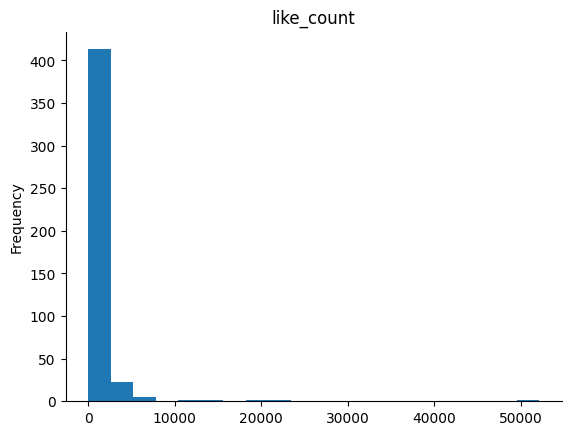

In [ ]:
# @title like_count

from matplotlib import pyplot as plt
like_count_counts['like_count'].plot(kind='hist', bins=20, title='like_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
quote_count_counts = df['quote_count'].value_counts().reset_index()
quote_count_counts.columns = ['quote_count', 'count']
quote_count_counts

,quote_count,count
0,0,221485
1,1,1139
2,2,238
3,3,137
4,4,76
...,...,...
70,190,1
71,98,1
72,75,1
73,123,1


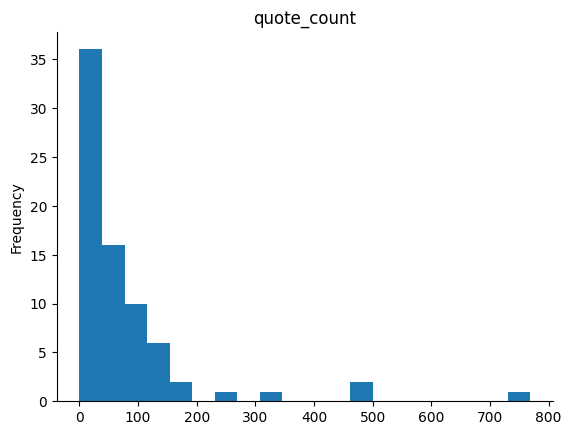

In [ ]:
# @title quote_count

from matplotlib import pyplot as plt
quote_count_counts['quote_count'].plot(kind='hist', bins=20, title='quote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
bookmark_count_counts = df['bookmark_count'].value_counts().reset_index()
bookmark_count_counts.columns = ['bookmark_count', 'count']
bookmark_count_counts

,bookmark_count,count
0,0,221344
1,1,1051
2,2,270
3,3,137
4,4,93
...,...,...
113,187,1
114,321,1
115,191,1
116,1640,1


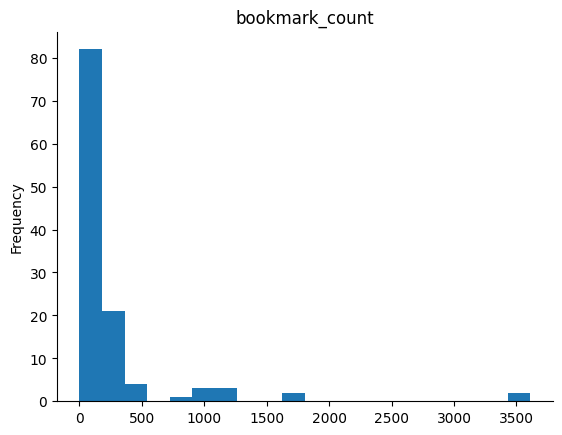

In [ ]:
# @title bookmark_count

from matplotlib import pyplot as plt
bookmark_count_counts['bookmark_count'].plot(kind='hist', bins=20, title='bookmark_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
impression_count_counts = df['impression_count'].value_counts().reset_index()
impression_count_counts.columns = ['impression_count', 'count']
impression_count_counts

,impression_count,count
0,0,193502
1,1,1040
2,2,829
3,4,808
4,3,807
...,...,...
2718,6226,1
2719,35825,1
2720,792,1
2721,969,1


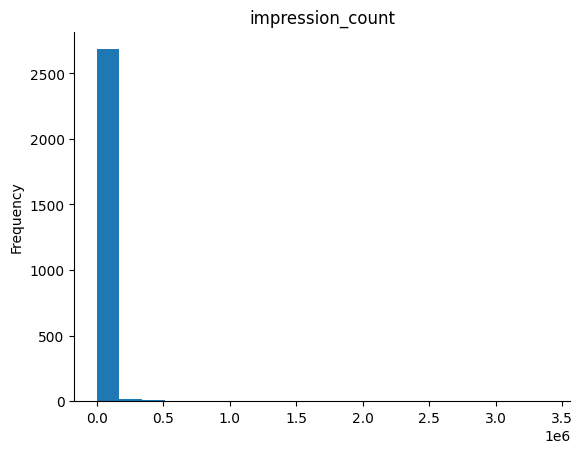

In [ ]:
# @title impression_count

from matplotlib import pyplot as plt
impression_count_counts['impression_count'].plot(kind='hist', bins=20, title='impression_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from collections import Counter

# join all the text into a single string
all_text = ' '.join(new_df['text'])

# count the frequency of each word
word_counts = Counter(all_text.split())

# print the top 10 most common words
print(word_counts.most_common(10))

[('RT', 193806), ('the', 152896), ('a', 95133), ('to', 92962), ('of', 89669), ('and', 75319), ('in', 69535), ('for', 50860), ('is', 49697), ('I', 43088)]


In [ ]:
new_df = df.loc[:, ['tweet_id', 'text', 'author_id', 'created_at']]
new_df

,tweet_id,text,author_id,created_at
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00
...,...,...,...,...
223381,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,2023-11-22T06:23:53+00:00
223382,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,2023-11-22T06:22:59+00:00
223383,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,2023-11-22T06:19:23+00:00
223384,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,2023-11-22T06:18:38+00:00


In [ ]:
vaccine_df = new_df.loc[:, ['tweet_id', 'text', 'author_id', 'created_at']]
vaccine_df

,tweet_id,text,author_id,created_at
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00
...,...,...,...,...
223381,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,2023-11-22T06:23:53+00:00
223382,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,2023-11-22T06:22:59+00:00
223383,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,2023-11-22T06:19:23+00:00
223384,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,2023-11-22T06:18:38+00:00


In [ ]:
vaccine_df.to_csv("my_vaccine_data.csv", index = False)

In [ ]:
# count the number of retweets and non-retweets
num_retweets = new_df[new_df['text'].str.startswith('RT')].shape[0]
num_non_retweets = new_df[~new_df['text'].str.startswith('RT')].shape[0]

# print the results
print(f"Number of retweets: {num_retweets}")
print(f"Number of non-retweets: {num_non_retweets}")

Number of retweets: 193737
Number of non-retweets: 29649


In [ ]:
import re

# define a regex pattern to match emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# find all the tweets that contain emojis
emoji_tweets = new_df[new_df['text'].apply(lambda x: bool(emoji_pattern.search(x)))]

# print the number of tweets that contain emojis
print(f"Number of tweets that contain emojis: {len(emoji_tweets)}")

Number of tweets that contain emojis: 12402


In [ ]:
# print the tweets that contain emojis
for index, row in emoji_tweets.iterrows():
    print(f"Tweet ID: {row['tweet_id']}")
    print(f"Author ID: {row['author_id']}")
    print(f"Text: {row['text']}")
    print("-----")

Streaming output truncated to the last 5000 lines.
-----
Tweet ID: 1753701961978052772
Author ID: 573832726
Text: @lomadia Oh god. I had the tetanus, pertussis, diphtheria combo and was feeling rough. Will be hoping for some good sound cancellation and a peaceful night 😿
-----
Tweet ID: 1753701161272533108
Author ID: 45594696
Text: @DemonaDarby He’s got to peel an entire lead lining and replace it so I don’t think it was ever gonna be quiet 😭

Other half also had MMR, polio and tetanus shots yesterday so he’s gonna have to hang in there on limited sleep.
-----
Tweet ID: 1753700686779589089
Author ID: 2349499225
Text: RT @ChildrensHD: 🚨 ‘A Very Dangerous Medical Experiment’: CDC Expands Vaccine Schedules for Kids, Pregnant Women + Most Adults  

“The @CDC…
-----
Tweet ID: 1753693391433429148
Author ID: 4739117598
Text: RT @ChildrensHD: 🚨 ‘A Very Dangerous Medical Experiment’: CDC Expands Vaccine Schedules for Kids, Pregnant Women + Most Adults  

“The @CDC…
-----
Tweet ID: 1753690421467

In [ ]:
import re

# define a regex pattern to match emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# find all the tweets that contain emojis
emoji_tweets = new_df[new_df['text'].apply(lambda x: bool(emoji_pattern.search(x)))]

# create a new dataframe with only the relevant columns
emoji_df = emoji_tweets[['tweet_id', 'author_id', 'text']]

# print the dataframe
emoji_df

,tweet_id,author_id,text
22,1752255710547599430,21888511,💉Get your flu and COVID-19 vaccinations tomorr...
37,1752252386469663183,231242719,RT @TheChiefNerd: 🚩 New Peer-Reviewed Study Fi...
43,1752250365439840450,465502339,"Kick #Polio out of Kenya.\n\n@MOH_Kenya, with ..."
60,1752246514406347042,251197114,RT @TheChiefNerd: 🚩 New Peer-Reviewed Study Fi...
66,1752244153969201480,1629789038432354304,RT @TheChiefNerd: 🚩 New Peer-Reviewed Study Fi...
...,...,...,...
223297,1727238366616584472,768460399935123457,RT @NNorthantsC: Free drop-in vaccination serv...
223348,1727220524588126481,1268116651964334081,"Free drop-in vaccination service: Morrisons, O..."
223349,1727220480686387367,3392296331,"Free drop-in vaccination service: Morrisons, O..."
223359,1727217825247642028,1569015985721561088,RT @medhnarayi: 📌Advocacy for vaccination is a...


In [ ]:
new_df.isnull().sum()

tweet_id      0
text          0
author_id     0
created_at    0
dtype: int64

In [ ]:
print(new_df['created_at'].head())

0    2024-01-30T09:15:16+00:00
1    2024-01-30T09:15:10+00:00
2    2024-01-30T09:14:33+00:00
3    2024-01-30T09:13:37+00:00
4    2024-01-30T09:12:52+00:00
Name: created_at, dtype: object


In [ ]:
print(new_df['created_at'].dtype)

object


In [ ]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
new_df['created_at_1'] = pd.to_datetime(new_df['created_at'], errors = 'coerce')


# Create a new column for the date, time, and day
new_df['date'] = new_df['created_at_1'].dt.date
new_df['time'] = new_df['created_at_1'].dt.time
new_df['day_of_week'] = new_df['created_at_1'].dt.day_name()
# Display the updated DataFrame
new_df

,tweet_id,text,author_id,created_at,created_at_1,date,time,day_of_week
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00,2024-01-30 09:15:16+00:00,2024-01-30,09:15:16,Tuesday
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00,2024-01-30 09:15:10+00:00,2024-01-30,09:15:10,Tuesday
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00,2024-01-30 09:14:33+00:00,2024-01-30,09:14:33,Tuesday
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00,2024-01-30 09:13:37+00:00,2024-01-30,09:13:37,Tuesday
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00,2024-01-30 09:12:52+00:00,2024-01-30,09:12:52,Tuesday
...,...,...,...,...,...,...,...,...
223381,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,2023-11-22T06:23:53+00:00,2023-11-22 06:23:53+00:00,2023-11-22,06:23:53,Wednesday
223382,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,2023-11-22T06:22:59+00:00,2023-11-22 06:22:59+00:00,2023-11-22,06:22:59,Wednesday
223383,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,2023-11-22T06:19:23+00:00,2023-11-22 06:19:23+00:00,2023-11-22,06:19:23,Wednesday
223384,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,2023-11-22T06:18:38+00:00,2023-11-22 06:18:38+00:00,2023-11-22,06:18:38,Wednesday


In [ ]:
new_df['has_hashtags'] = new_df['text'].str.contains('#', case = False)

#Count nummber of hashtags
new_df['num_hashtags'] = new_df['text'].apply(lambda x: len([ c for c in x if c =='#']))


In [ ]:
new_df['list_of_hashtags'] = new_df['text'].apply(lambda x: [word for word in x.split() if word.startswith("#")])
new_df

,tweet_id,text,author_id,created_at,created_at_1,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00,2024-01-30 09:15:16+00:00,2024-01-30,09:15:16,Tuesday,False,0,[]
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00,2024-01-30 09:15:10+00:00,2024-01-30,09:15:10,Tuesday,False,0,[]
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00,2024-01-30 09:14:33+00:00,2024-01-30,09:14:33,Tuesday,False,0,[]
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00,2024-01-30 09:13:37+00:00,2024-01-30,09:13:37,Tuesday,False,0,[]
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00,2024-01-30 09:12:52+00:00,2024-01-30,09:12:52,Tuesday,False,0,[]
...,...,...,...,...,...,...,...,...,...,...,...
223381,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,2023-11-22T06:23:53+00:00,2023-11-22 06:23:53+00:00,2023-11-22,06:23:53,Wednesday,False,0,[]
223382,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,2023-11-22T06:22:59+00:00,2023-11-22 06:22:59+00:00,2023-11-22,06:22:59,Wednesday,False,0,[]
223383,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,2023-11-22T06:19:23+00:00,2023-11-22 06:19:23+00:00,2023-11-22,06:19:23,Wednesday,False,0,[]
223384,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,2023-11-22T06:18:38+00:00,2023-11-22 06:18:38+00:00,2023-11-22,06:18:38,Wednesday,False,0,[]


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 10.8 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
# check for presence of emojis
new_df['has_emojis'] = new_df['text'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x))

#Extract emojis into a list
new_df['emojis_list'] = new_df['text'].apply(lambda x: [char for char in x if char in emoji.EMOJI_DATA])

In [ ]:
new_df['num_of_emoji'] = new_df['emojis_list'].apply(len)
new_df.head()

,tweet_id,text,author_id,created_at,created_at_1,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00,2024-01-30 09:15:16+00:00,2024-01-30,09:15:16,Tuesday,False,0,[],False,[],0
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00,2024-01-30 09:15:10+00:00,2024-01-30,09:15:10,Tuesday,False,0,[],False,[],0
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00,2024-01-30 09:14:33+00:00,2024-01-30,09:14:33,Tuesday,False,0,[],False,[],0
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00,2024-01-30 09:13:37+00:00,2024-01-30,09:13:37,Tuesday,False,0,[],False,[],0
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00,2024-01-30 09:12:52+00:00,2024-01-30,09:12:52,Tuesday,False,0,[],False,[],0


In [ ]:
# count the number of words
new_df['num_words'] = new_df['text'].apply(lambda x: len(x.split()))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function to count words after removing stopwords
def count_words_without_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = [word for word in text.split() if word.lower() not in stop_words]
  return len(words)

new_df['num_words_without_stopwords'] = new_df['text'].apply(count_words_without_stopwords)

In [ ]:
# create a new column with stopword ratio
new_df['stopword_ratio'] = new_df['num_words_without_stopwords']/new_df['num_words']

In [ ]:
new_df

,tweet_id,text,author_id,created_at,created_at_1,date,time,day_of_week,has_hashtags,num_hashtags,list_of_hashtags,has_emojis,emojis_list,num_of_emoji,num_words,num_words_without_stopwords,stopword_ratio
0,1752259172022747314,"RT @WotsOnInfo: ""The Department of Child Prote...",889417602648375296,2024-01-30T09:15:16+00:00,2024-01-30 09:15:16+00:00,2024-01-30,09:15:16,Tuesday,False,0,[],False,[],0,21,16,0.761905
1,1752259145653178518,RT @AlastairMcA30: This is the diarrheal ward ...,251286386,2024-01-30T09:15:10+00:00,2024-01-30 09:15:10+00:00,2024-01-30,09:15:10,Tuesday,False,0,[],False,[],0,25,11,0.440000
2,1752258992007717068,"RT @WotsOnInfo: ""The Department of Child Prote...",1543087505783721985,2024-01-30T09:14:33+00:00,2024-01-30 09:14:33+00:00,2024-01-30,09:14:33,Tuesday,False,0,[],False,[],0,21,16,0.761905
3,1752258756086518238,RT @AlastairMcA30: This is the diarrheal ward ...,1448975478115618820,2024-01-30T09:13:37+00:00,2024-01-30 09:13:37+00:00,2024-01-30,09:13:37,Tuesday,False,0,[],False,[],0,25,11,0.440000
4,1752258566826627321,RT @AlastairMcA30: This is the diarrheal ward ...,20480274,2024-01-30T09:12:52+00:00,2024-01-30 09:12:52+00:00,2024-01-30,09:12:52,Tuesday,False,0,[],False,[],0,25,11,0.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223381,1727211280648532394,RT @alualu75828826: Advocacy for vaccination i...,1569015985721561088,2023-11-22T06:23:53+00:00,2023-11-22 06:23:53+00:00,2023-11-22,06:23:53,Wednesday,False,0,[],False,[],0,22,15,0.681818
223382,1727211054047076788,RT @4Tigray_2: Advocacy for vaccination is a s...,1569015985721561088,2023-11-22T06:22:59+00:00,2023-11-22 06:22:59+00:00,2023-11-22,06:22:59,Wednesday,False,0,[],False,[],0,23,16,0.695652
223383,1727210145405599900,RT @Shewit_16: Advocacy for vaccination is a s...,1563665318765297665,2023-11-22T06:19:23+00:00,2023-11-22 06:19:23+00:00,2023-11-22,06:19:23,Wednesday,False,0,[],False,[],0,23,16,0.695652
223384,1727209958826283061,RT @awakenindiamvmt: School principal files po...,1415610292243812352,2023-11-22T06:18:38+00:00,2023-11-22 06:18:38+00:00,2023-11-22,06:18:38,Wednesday,False,0,[],False,[],0,21,13,0.619048


In [ ]:
hashtag_counts = new_df['has_hashtags'].value_counts()
hashtag_counts

False    206362
True      17024
Name: has_hashtags, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

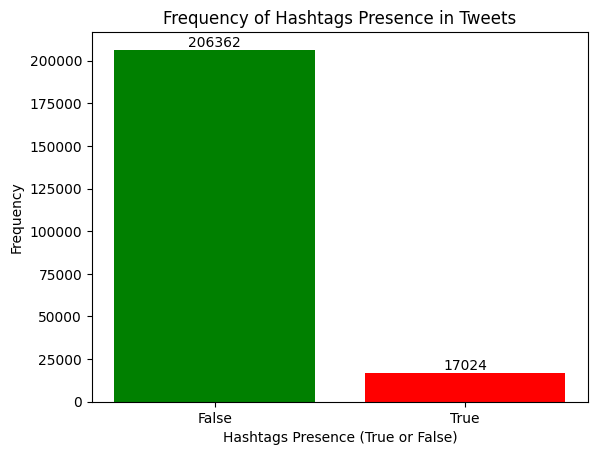

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(hashtag_counts.index.astype(str), hashtag_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('Hashtags Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of Hashtags Presence in Tweets')
plt.show()

In [ ]:
emoji_counts = new_df['has_emojis'].value_counts()
emoji_counts

False    204182
True      19204
Name: has_emojis, dtype: int64

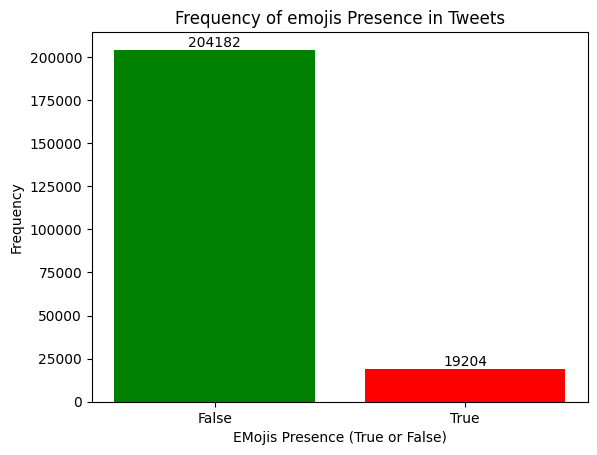

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(emoji_counts.index.astype(str), emoji_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('EMojis Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of emojis Presence in Tweets')
plt.show()

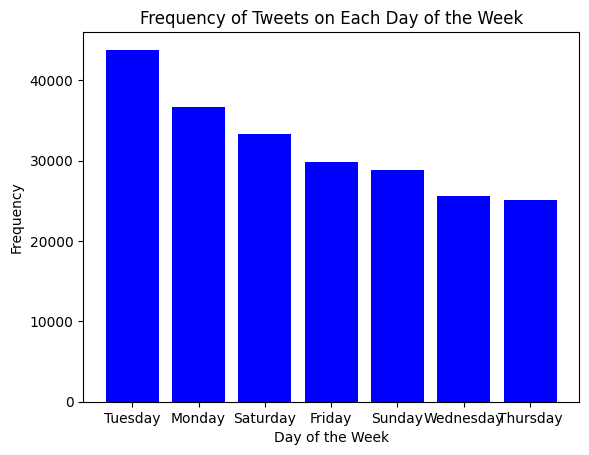

In [ ]:
day_of_week_counts = new_df['day_of_week'].value_counts()

plt.bar(day_of_week_counts.index, day_of_week_counts, color = 'blue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Tweets on Each Day of the Week')
plt.show()

In [ ]:
day_of_week_counts

Tuesday      43829
Monday       36693
Saturday     33372
Friday       29883
Sunday       28879
Wednesday    25554
Thursday     25176
Name: day_of_week, dtype: int64

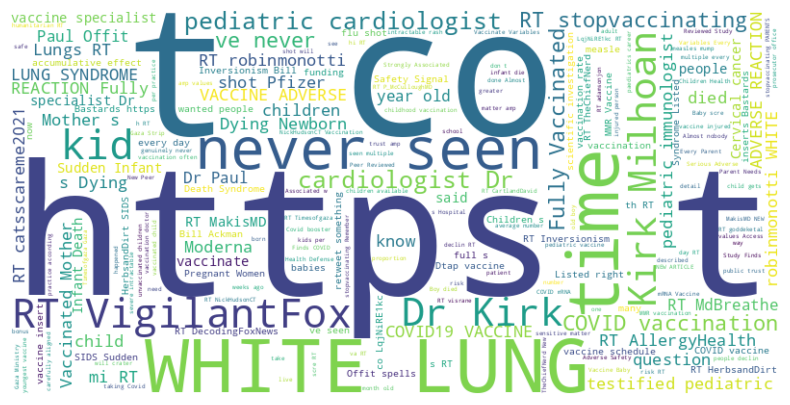

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# combine all the tweets into a single string
text = " ".join(tweet for tweet in new_df['text'])

# create a wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re

# define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# extract all the URLs from the text column
urls = new_df['text'].apply(lambda x: re.findall(url_pattern, x))

# flatten the list of URLs
urls = [url for sublist in urls for url in sublist]

# count the frequency of each URL
url_counts = pd.Series(urls).value_counts().head(10)

# print the top 10 URLs with their count line by line
for url, count in url_counts.iteritems():
    print(url, count)


https://t.co/LqjNiRE1kc 3203
https://t.co/d95G… 820
https://t.co… 744
https://t.co/AwCu90Ym7E 476
https://t.co/yYY4ZCgnJU 258
https://t.co/avhEwKBEgu 193
https://t… 187
https://t.co/pIXt2ilyPe 161
https://t.co/0I7LcC78gs 150
https://t.co/Z0UrBA9tyP 149


<ipython-input-30-3d0b2431038b>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for url, count in url_counts.iteritems():


In [ ]:
import re

# define a regex pattern to match mentions
mention_pattern = re.compile(r'@\w+')

# extract all the mentions from the text column
mentions = new_df['text'].apply(lambda x: re.findall(mention_pattern, x))

# flatten the list of mentions
mentions = [mention for sublist in mentions for mention in sublist]

# count the frequency of each mention
mention_counts = pd.Series(mentions).value_counts().head(10)

# print the top 10 mentions with their counts
for mention, count in mention_counts.iteritems():
    print(mention, count)


@VigilantFox 13512
@stopvaccinating 11952
@AllergyHealth 9911
@robinmonotti 9663
@catsscareme2021 9091
@MdBreathe 6675
@MakisMD 5633
@DecodingFoxNews 5305
@HerbsandDirt 5203
@Inversionism 4168


<ipython-input-32-22fdce999485>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for mention, count in mention_counts.iteritems():


In [ ]:
import re

# define a regex pattern to match hashtags
hashtag_pattern = re.compile(r'#\w+')

# extract all the hashtags from the text column
hashtags = new_df['text'].apply(lambda x: re.findall(hashtag_pattern, x))

# flatten the list of hashtags
hashtags = [hashtag for sublist in hashtags for hashtag in sublist]

# count the frequency of each hashtag
hashtag_counts = pd.Series(hashtags).value_counts().head(10)

# print the top 10 hashtags with their counts
for hashtag, count in hashtag_counts.iteritems():
    print(hashtag, count)


#1 3024
#8 1640
#vaccination 743
#Gaza 592
#Eritrea 541
#measles 535
#Measles 530
#COVID19 522
#GazaStrip 516
#malaria 393


<ipython-input-33-29061b6c7cdd>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for hashtag, count in hashtag_counts.iteritems():


In [ ]:
import re

# define a regex pattern to match hashtags
hashtag_pattern = re.compile(r'#\w+')

# extract all the hashtags from the text column
hashtags = new_df['text'].apply(lambda x: re.findall(hashtag_pattern, x))

# flatten the list of hashtags
hashtags = [hashtag for sublist in hashtags for hashtag in sublist]

# count the frequency of each hashtag
hashtag_counts = pd.Series(hashtags).value_counts()

# print the list of hashtags with their counts
for hashtag, count in hashtag_counts.iteritems():
    print(hashtag, count)


<ipython-input-34-6593f2ae9041>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for hashtag, count in hashtag_counts.iteritems():


#1 3024
#8 1640
#vaccination 743
#Gaza 592
#Eritrea 541
#measles 535
#Measles 530
#COVID19 522
#GazaStrip 516
#malaria 393
#flu 301
#children 293
#Vaccination 287
#polio 229
#VaccinesWork 203
#vaccine 161
#mRNA 160
#JAMA 160
#Cameroon 157
#Polio 156
#vaccines 155
#ZeroDose 149
#MMR 149
#Vaccine 145
#MissionIndradhanush 139
#WHO 136
#Covid19 134
#RSV 122
#MedicalColleges 121
#COVID 117
#worldchildrensday 112
#Ableg 108
#HepBvaccine 105
#NIVW 104
#EndPolio 102
#Moderna 102
#covid 99
#GA 98
#Flu 91
#DepopulationAgenda 89
#UNICEF 88
#Pfizer 81
#covid19 81
#vaccinations 81
#FightFlu 78
#ViksitBharatBudget 77
#pregnant 73
#6 72
#GetWinterStrong 72
#CleanAir 70
#HPV 69
#PushBack 67
#Toronto 67
#bced 66
#heartattacks 66
#xbbvax 65
#baby 64
#ENDPolioKE 62
#VaccineSideEffects 62
#vaccinated 62
#health 60
#DYK 57
#parents 57
#DrBonnieHenry 57
#pertussis 55
#healthcare 54
#5 54
#Health 53
#Pregnancy 52
#CervicalCancer 51
#Russia 51
#Vaccines 49
#babies 48
#VaccineGenocide 47
#PublicHealth 47
#HAPP

In [ ]:
import re

# define a regex pattern to match hashtags
hashtag_pattern = re.compile(r'#\w+')

# extract all the hashtags from the text column
hashtags = new_df['text'].apply(lambda x: re.findall(hashtag_pattern, x))

# flatten the list of hashtags
hashtags = [hashtag for sublist in hashtags for hashtag in sublist]

# count the frequency of each hashtag
hashtag_counts = pd.Series(hashtags).value_counts()

# save the list of hashtags with their counts as a CSV file
hashtag_counts.to_csv('hashtag_counts.csv')


In [ ]:
import re

# define a regex pattern to match hashtags
hashtag_pattern = re.compile(r'#\w+')

# extract all the hashtags from the text column
hashtags = new_df['text'].apply(lambda x: re.findall(hashtag_pattern, x))

# flatten the list of hashtags
hashtags = [hashtag for sublist in hashtags for hashtag in sublist]

# count the frequency of each hashtag
hashtag_counts = pd.Series(hashtags).value_counts().head(10)

# save the list of top 10 hashtags with their counts as a CSV file
hashtag_counts.to_csv('top_10_hashtags.csv')


In [ ]:
import re

# define a regex pattern to match links
link_pattern = re.compile(r'http\S+')

# extract all the links from the text column
links = new_df['text'].apply(lambda x: re.findall(link_pattern, x))

# flatten the list of links
links = [link for sublist in links for link in sublist]

# count the frequency of each link
link_counts = pd.Series(links).value_counts().head(10)

# save the list of top 10 links with their counts as a CSV file
link_counts.to_csv('top_10_links.csv')


In [ ]:
import re

# define a regex pattern to match mentions
mention_pattern = re.compile(r'@\w+')

# extract all the mentions from the text column
mentions = new_df['text'].apply(lambda x: re.findall(mention_pattern, x))

# flatten the list of mentions
mentions = [mention for sublist in mentions for mention in sublist]

# count the frequency of each mention
mention_counts = pd.Series(mentions).value_counts().head(10)

# save the list of top 10 mentions with their counts as a CSV file
mention_counts.to_csv('top_10_mentions.csv')
